# Interconnect - Projeto proposto pela Tripleten
-------------------------------------

**Nome: Izabela Hammerschlag** </br>

**Data: 19/09/2023**  </br>

-----------------------------------

# Relatório Final
-----------------------------------

## Resumo:

A empresa Interconnect estava perdendo clientes. Com o objetivo de prever clientes que têm características de rescindir o contrato, desenvolvemos um modelo preditivo para prever o churn. Os dados fornecidos pela empresa foram pré-processados, analisados (EAD) e utilizados para treinar diferentes modelos, incluindo regressão logística, árvore de decisão e floresta aleatória. Entre esses modelos, analisamos as métricas F1-score e AUC-ROC. O modelo que apresentou as melhores métricas foi a regressão logística. Com uma performance de F1-Score: 0.64 e AUC-ROC: 0.76.

### Plano de trabalho:

Inicialmente, realizaremos um pré-processamento dos dados para identificar os tipos de dados em cada dataframe e analisaremos as colunas, verificando a presença de valores faltantes e duplicados. Além disso, investigaremos se há valores preenchidos de maneira incorreta, para que possam ser corrigidos, se necessário.

Em seguida, procederemos com a análise exploratória de dados, explorando as estatísticas e características dos dados, incluindo a avaliação de possíveis desequilíbrios.

A próxima etapa envolverá a divisão dos dados em conjuntos de treinamento e teste. Posteriormente, iremos treinar modelos de classificação e avaliar quais modelos obtiveram as melhores métricas.

## Índice <a id='back'></a>

* [Introdução](#intro)
* [Inicialização](#inicio)
* [Carregar Dados](#carregando)
* [Pré-processamento de dados](#predados)
* [Análise Exploratória de Dados (AED)](#aed)
* [Treinamento e avaliação dos modelos](#treinamento)
* [Conclusão](#conclusao)

## Introdução <a id='intro'></a>

* Telecomunicação (PREVISÃO DE CHURN):

A predição de churn é o processo que utiliza análise preditiva para determinar a probabilidade de um cliente deixar de usar um produto ou serviço, ou seja, abandonar a base de clientes da empresa. Neste projeto trabalharemos com dados de 4 dataframes fornecidos pela empresa de telecomunicação,  queremos prever o perfil dos clientes em potencial que provavelmente deixarão de usar o serviço. Avaliaremos os modelos através das métricas F1 e AUC-ROC.

## Inicialização <a id='inicio'></a>

Importando das bibliotecas necessárias para executar o projeto

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_curve, RocCurveDisplay, f1_score, classification_report, ConfusionMatrixDisplay

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


## Carregar Dados <a id='carregando'></a>

Os arquivos estão em formato csv, carregando como df_nomedoarquivo.

In [75]:
df_contract = pd.read_csv('./contract.csv')

In [76]:
df_personal = pd.read_csv('./personal.csv')

In [77]:
df_internet = pd.read_csv('./internet.csv')

In [78]:
df_phone = pd.read_csv('./phone.csv')

## Pré-processamento de dados <a id='predados'></a>

### Visão geral dos dados: 
A seguir, iremos visualizar os dados, verificando as informações de cada coluna e efetuando as correções necessárias antes de prosseguirmos para a Análise Exploratória de Dados.

* df_contract:

In [79]:
df_contract.head() # contrato 

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


Temos as colunas nomeadas no formato camelCase. A coluna `customerId` contém o (código ID) identificador do cliente, `BeginDate` indica a data de início do serviço contratado, `EndDate` representa a data de término do contrato, `Type` especifica o tipo de duração do contrato, `PaperlessBilling` indica se o cliente recebe boleto impresso, `PaymentMethod` descreve o método de pagamento, `MonthlyCharges` informa o valor pago mensalmente, e `TotalCharges` indica o valor total pago.

In [80]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


A coluna `BeginDate`, `EndDate` e `TotalCharges` não contém o dtype correto. Elas precisam ser corrigidas.

In [81]:
df_contract.nunique() # valores únicos correspondentes para cada coluna.

customerID          7043
BeginDate             77
EndDate                5
Type                   3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
dtype: int64

Vamos olhar para cada coluna separadamente, visualizando as colunas e corrigindo os dados que precisarem.

In [82]:
df_contract['customerID'].value_counts()

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

Os dados parecem estar corretos. São apenas identificadores para cada cliente.

Essa coluna é a coluna em comum com os outros dataframes. Com ela, poderemos unir os dataframes, caso necessário.

In [83]:
df_contract['BeginDate']

0       2020-01-01
1       2017-04-01
2       2019-10-01
3       2016-05-01
4       2019-09-01
           ...    
7038    2018-02-01
7039    2014-02-01
7040    2019-03-01
7041    2019-07-01
7042    2014-08-01
Name: BeginDate, Length: 7043, dtype: object

Vamos corrigir o tipo de dado, pois na informação consta que o dtype é "object".

In [84]:
df_contract['BeginDate'].min()

'2013-10-01'

 - Data mais antiga.

In [85]:
df_contract['BeginDate'].max()

'2020-02-01'

 - Data mais recente.

In [86]:
df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'], format='%Y-%m-%d')

Corrigindo dtype para data acima e verificando correção abaixo

In [87]:
df_contract['BeginDate']

0      2020-01-01
1      2017-04-01
2      2019-10-01
3      2016-05-01
4      2019-09-01
          ...    
7038   2018-02-01
7039   2014-02-01
7040   2019-03-01
7041   2019-07-01
7042   2014-08-01
Name: BeginDate, Length: 7043, dtype: datetime64[ns]

In [88]:
df_contract['EndDate'].value_counts()

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: EndDate, dtype: int64

`df_contract['EndDate']` é Nosso objetivo/target.
Essa coluna possui valores de datas para clientes que rescindiram o contrato e 'No' para clientes ativos.
Essa coluna precisará ser modificada, pois apresenta uma mistura de strings e datas.
A informação relevante aqui seria 1 = ainda é cliente ('No'), 0 = rescindiu o contrato (data).

In [89]:
(df_contract[df_contract['EndDate'] != 'No']['EndDate']).count()/df_contract['EndDate'].count() 

0.2653698707936959

Podemos perceber que os dados estão desbalanceados. A porcentagem dos que saíram está acima.

Os dados desbalanceados nesta coluna podem prejudicar o treinamento do modelo porque leva a um aprendizado tendencioso em direção a classe que tem mais elementos, resultando em desempenho fraco na detecção da classe minoritária. Isso deve ser considerado no treinamento.

In [90]:
df_contract['Type'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64

Esta coluna informa se o contrato é renovado mensalmente, anualmente ou a cada 2 anos. Podemos perceber que grande parte dos clientes optam por assinatura de renovação mensal.

In [91]:
df_contract['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

Esta coluna informa se usuário recebe a conta impressa, na maior parte dos usuários (4171) recebem o boleto em papel.

In [92]:
df_contract['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

Esta coluna mostra que os usuários podem optar por 4 formas de pagamento, podemos visualizar que a mais utilizada é Eletronic check.

In [93]:
df_contract['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

Podemos perceber valores diversificados de pagamento mensal dos clientes. Abaixo verificaremos a média, mediana e quartis destes dados.

In [94]:
df_contract['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

Podemos ver uma distribuição assimetrica, com um pico ente 20 a 30.

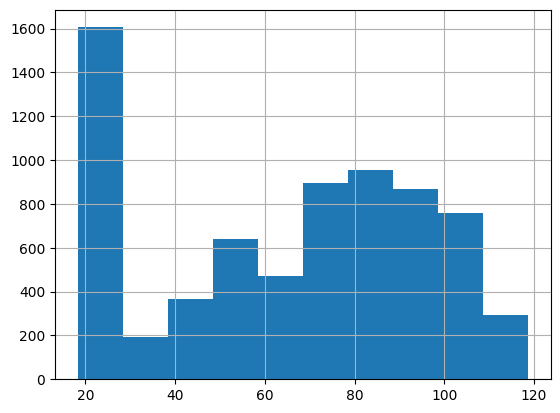

In [95]:
df_contract['MonthlyCharges'].hist(bins=10);

In [96]:
df_contract['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

Visualizando a coluna `TotalCharges`, percebemos que existem 11 linhas com string vazia, vamos corrigir abaixo:

In [97]:
total_charges_median = df_contract[df_contract['TotalCharges'] != ' ']['TotalCharges'].median() # mediana da coluna
df_contract['TotalCharges'] = df_contract['TotalCharges'].replace({' ': total_charges_median}) # substituindo a string pela mediana
df_contract['TotalCharges'] = pd.to_numeric(df_contract['TotalCharges']) # mudando o dtype para float.

Como a mediana representa melhor dados que não são normalmente distribuidos, fizemos a correção das strings vazias pela mediana dos valores da coluna.

In [98]:
df_contract['TotalCharges'].describe()

count    7043.000000
mean     2281.916928
std      2265.270398
min        18.800000
25%       402.225000
50%      1397.475000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

Podemos ver uma grande diferença entre a media e a mediana.

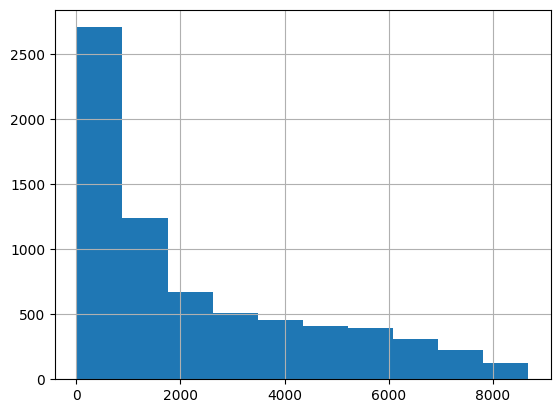

In [99]:
df_contract['TotalCharges'].hist(bins=10);

No histograma acima podemos visualizar que os dados tem uma distribuição de lei de potência. 

* df_personal:

In [100]:
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


Esta coluna contém informações pessoais dos clientes. Temos as colunas nomeadas no formato camelCase. Onde `customerID` traz o (código ID) identificador do cliente, `gender` informa o gênero do cliente, `SeniorCitizen` indica se é idoso, `Partner` informa se tem parceiro, e `Dependents` informa se possui dependentes.

In [101]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


Os tipos de dados parecem estar corretos.

In [102]:
df_personal.nunique()

customerID       7043
gender              2
SeniorCitizen       2
Partner             2
Dependents          2
dtype: int64

Acima temos os valores únicos para cada coluna.

In [103]:
df_personal['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

O genero esta balanceado

In [104]:
df_personal['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [105]:
df_personal['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [106]:
df_personal['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

Todas as colunas de df_personal parecem estar coerentes e não necessitam de correção do dtype.

* df_internet: 

In [107]:
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


Novamente, tem a coluna `customerID` trás o (cógido ID) indentificador do cliente, e para cada cliente: `InternetService` informa o tipo de serviço de internet, `OnlineSecurity` se tem segurança online,  `OnlineBackup` se tem backup, `TechSupport` infoma se tem suporte tech contrato, `StreamingTV` se tem streaming de TV contratado,  `StreamingMovies` se tem filmes em Streaming.

In [108]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


Podemos verificar nas informações que o número de linhas deste dataframe é menor  que os do df_contract e df_personal. Todas as colunas tem dtype Object,  não temos valores ausentes.

In [109]:
df_internet.nunique()

customerID          5517
InternetService        2
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
dtype: int64

Todas as colunas deste dataframe tem valores binarios ('No' ou 'Yes'). 

* df_phone:

In [110]:
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Neste dataframe temos apenas o `customerID` e `MultipleLines` que tem a informação se o cliente tem multiplas linhas ou não.

In [111]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


Podemos visualizar que o número de linhas deste dataframe é menor  que os do df_contract e df_personal. Todas as colunas tem dtype Object,  não temos valores ausentes.

O dtype está correto. Embora, assim como em df_internet, a informação de multiplas linhas pode ser substituida por 0 e 1 pois são valores binários como 'No' e 'Yes'. Ajustaremos estes valores na análise exploratória de dados. Assim deixando os dados no formato para o treinamento.

Vamos checar para todos os dataframes se existem valores duplicados: 

In [112]:
datas = {'Contract': df_contract,
         'Personal':df_personal,
         'Internet': df_internet, 
         'Phone': df_phone }

In [113]:
for chave, valor in datas.items():
    print(chave)
    print(f'Valores duplicados:{valor.duplicated().sum()}')

Contract
Valores duplicados:0
Personal
Valores duplicados:0
Internet
Valores duplicados:0
Phone
Valores duplicados:0


   Após visualizarmos todas as tabelas fornecidas, checando dados ausentes, duplicados e valores de cada coluna. 
   Concluimos que os dados estão prontos para seguir para etapa de analise exploratória de dados.

## Análise Exploratória de Dados (AED) <a id='aed'></a>

Vamos analisar os dados de contrato para clientes que estão ativos e clientes que rescindiram o contrato.

Amostra de 3 linhas da tabela contract:

In [114]:
df_contract.sample(3)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1859,4143-HHPMK,2015-08-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,85.35,4338.60
397,6599-CEBNN,2017-03-01,2020-01-01 00:00:00,Month-to-month,Yes,Credit card (automatic),73.95,2524.45
1848,7190-XHTWJ,2016-12-01,No,One year,No,Mailed check,19.30,755.50


In [115]:
active_clients = df_contract[df_contract['EndDate'] == 'No'] # clientes ativos
churn_clients = df_contract[df_contract['EndDate'] != 'No'] # clientes que sairam

,MonthlyCharges,TotalCharges
count,5174.000000,5174.000000
mean,61.265124,2552.882494
std,31.092648,2327.590132
min,18.250000,18.800000
25%,25.100000,579.575000
50%,64.425000,1679.525000
75%,88.400000,4262.850000
max,118.750000,8672.450000


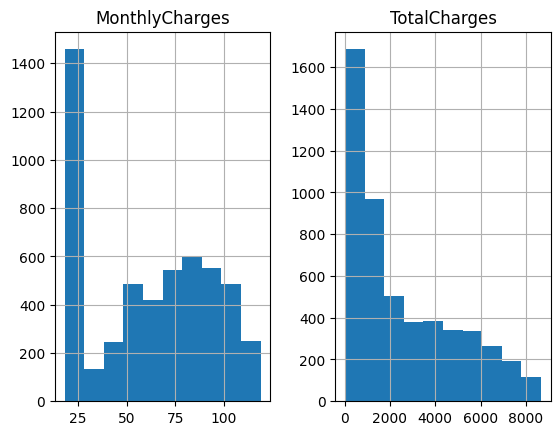

In [116]:
active_clients.hist(['MonthlyCharges','TotalCharges'])
active_clients.describe()

Para os clientes ativos, podemos observar que a média do custo por mês é de 61,3, com uma mediana de 64,4. O custo total apresenta uma média de 2.553, com uma mediana de 1.680. Ambos os histogramas exibem um maior número de ocorrências próximas a valores menores.

,MonthlyCharges,TotalCharges
count,1869.000000,1869.000000
mean,74.441332,1531.796094
std,24.666053,1890.822994
min,18.850000,18.850000
25%,56.150000,134.500000
50%,79.650000,703.550000
75%,94.200000,2331.300000
max,118.350000,8684.800000


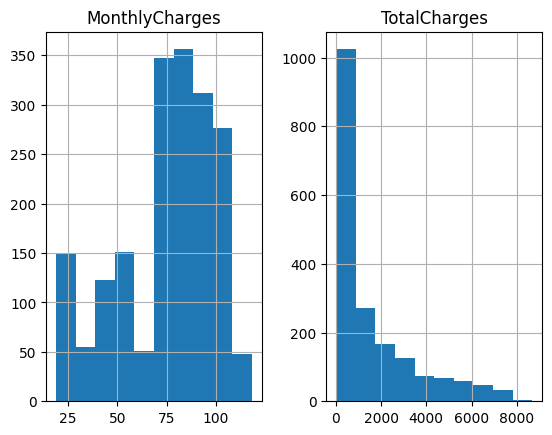

In [117]:
churn_clients.hist(['MonthlyCharges','TotalCharges'])
churn_clients.describe()

Para os clientes inativos, podemos observar que a média do custo por mês é de 74,4, com uma mediana de 79,6. O custo total apresenta uma média de 1.531, com uma mediana de 703. No histograma de gastos mensais, podemos ver que as maiores ocorrências estão concentradas entre valores acima de 60 a 100. No histograma de gastos totais, observamos um decréscimo exponencial, com o maior número de ocorrências próximo a 0 e 1000.

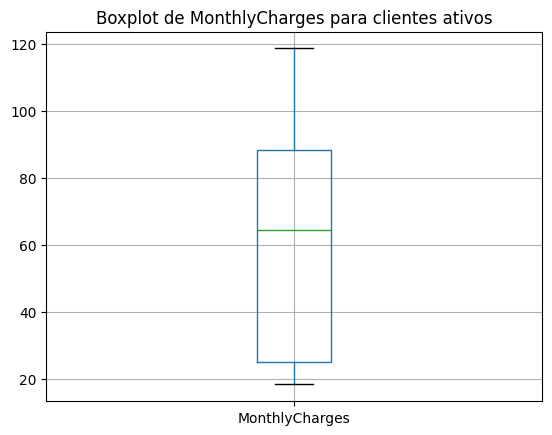

In [118]:
active_clients.boxplot(['MonthlyCharges'])
plt.title('Boxplot de MonthlyCharges para clientes ativos');

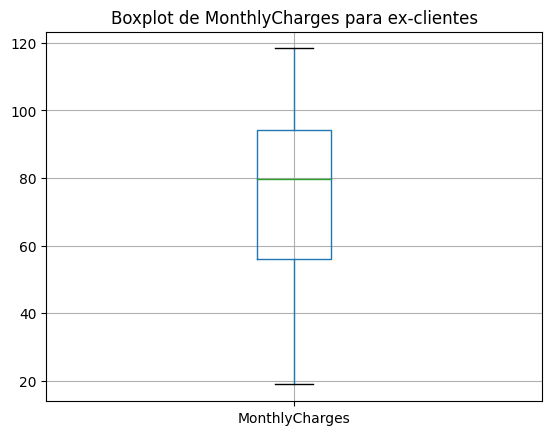

In [119]:
churn_clients.boxplot(['MonthlyCharges'])
plt.title('Boxplot de MonthlyCharges para ex-clientes');

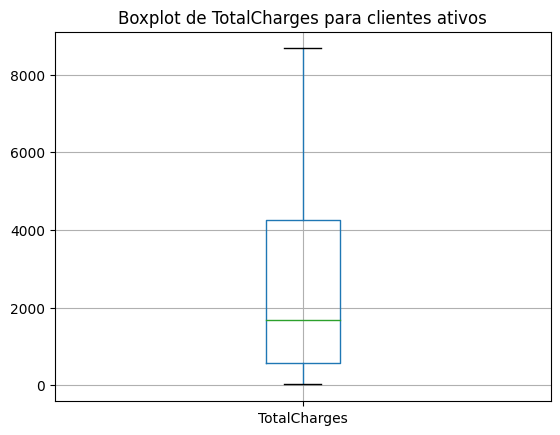

In [120]:
active_clients.boxplot(['TotalCharges'])
plt.title('Boxplot de TotalCharges para clientes ativos');

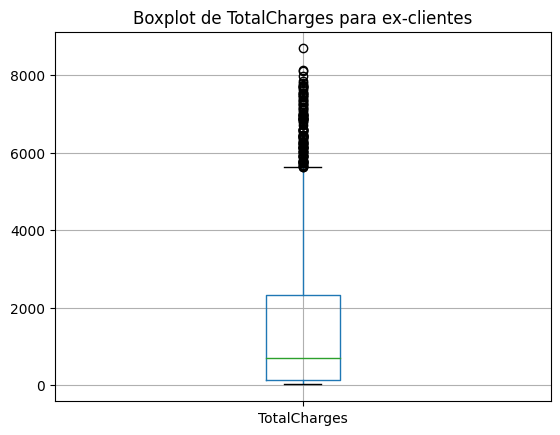

In [121]:
churn_clients.boxplot(['TotalCharges'])
plt.title('Boxplot de TotalCharges para ex-clientes');

As observações e comparações das médias e medianas podem ser visualizadas nos boxplots acima. Além disso, podemos identificar os quartis, e no caso de TotalCharges, notamos a presença de pontos atípicos (outliers) em clientes que rescindiram o contrato (churn).

In [122]:
df_contract.sample(3)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2428,2519-FAKOD,2016-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Bank transfer (automatic),99.25,3777.15
6049,7634-HLQJR,2016-03-01,No,Two year,No,Credit card (automatic),20.05,1016.70
1483,0743-HNPFG,2015-11-01,No,One year,Yes,Credit card (automatic),69.75,3562.50


Através da coluna EndDate, é possível criar uma nova coluna contendo valores de 0 e 1, onde 0 representa que o cliente continua utilizando os serviços e 1 indica que o cliente rescindiu o contrato. 

Nova coluna para o target:

In [123]:
df_contract['target'] = np.where(df_contract['EndDate']=='No',0,1)

Verificando uma amostra de df_contract:

In [124]:
df_contract.sample()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target
5338,2580-ASVVY,2017-01-01,No,Two year,No,Electronic check,45.4,1593.1,0


Agora vamos juntar as informações de contrato e pessoal através da coluna costumerID:

In [125]:
df_contract_personal = df_contract.merge(right=df_personal, on='customerID', how='outer')
df_contract_personal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   target            7043 non-null   int64         
 9   gender            7043 non-null   object        
 10  SeniorCitizen     7043 non-null   int64         
 11  Partner           7043 non-null   object        
 12  Dependents        7043 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 770.3+ KB


Verificando:

In [126]:
df_contract_personal.sample()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target,gender,SeniorCitizen,Partner,Dependents
354,0623-IIHUG,2018-04-01,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,41.9,840.1,1,Female,1,No,No


Algumas Analises com a junção das informações de contrato e informações pessoais:

Abaixo faremos um agrupamento por target e dentro de cada valor de target outro agrupamento com relação as colunas: `Type`,`PaperlessBilling`,`PaymentMethod`,`gender`,`SeniorCitizen`,`Partner`,`Dependents`. Observando a média de `TotalCharges` e `MonthlyCharges` desses grupos. O objetivo é observar se existem valores discrepantes entre grupos.

In [127]:
columns = ['Type','PaperlessBilling','PaymentMethod','gender','SeniorCitizen','Partner','Dependents']
for column in columns:
    print(df_contract_personal.groupby(['target', column])['TotalCharges'].mean())
    print('--------')
    print(df_contract_personal.groupby(['target', column])['MonthlyCharges'].mean())
    print('-------------------------------')

target  Type          
0       Month-to-month    1521.927590
        One year          2902.417578
        Two year          3665.133576
1       Month-to-month    1164.460574
        One year          4066.212048
        Two year          5432.363542
Name: TotalCharges, dtype: float64
--------
target  Type          
0       Month-to-month    61.462635
        One year          62.508148
        Two year          60.012477
1       Month-to-month    73.019396
        One year          85.050904
        Two year          86.777083
Name: MonthlyCharges, dtype: float64
-------------------------------
target  PaperlessBilling
0       No                  1978.029650
        Yes                 3051.392557
1       No                  1196.915991
        Yes                 1643.980929
Name: TotalCharges, dtype: float64
--------
target  PaperlessBilling
0       No                  49.813962
        Yes                 71.195525
1       No                  63.157463
        Yes                 7

Nossa análise se concentra em entender as tendências de churn (rotatividade de clientes) com base em diferentes variáveis, incluindo o tipo de contrato (Type), preferência de faturamento (PaperlessBilling) e outras características dos clientes. Vamos resumir nossas observações a seguir:

* Tipo de Contrato (Type):

    Ao agrupar os dados por tipo de contrato (Type) e o status do cliente (target), notamos que os ex-clientes (target = 1) tendem a ter médias de pagamento total (TotalCharges) mais altas para contratos anuais ou a cada 2 anos em comparação com os clientes ativos (target = 0). 
    Em contrapartida, para contratos mensais (Month-to-month), a média de pagamento total é maior para os clientes ativos (target = 0) em comparação com os ex-clientes (target = 1).
    Além disso, observamos que os ex-clientes (target = 1) têm médias de pagamento mensal (MonthlyCharges) mais altas em comparação com os clientes ativos (target = 0), independentemente do tipo de contrato.


* Faturamento sem Papel (PaperlessBilling):

    Clientes com faturamento eletrônico (Yes) geralmente têm médias de TotalCharges e MonthlyCharges mais altas em comparação com clientes que recebem faturas impressas (No).
    A diferença entre as médias é mais acentuada para TotalCharges.


* Método de Pagamento (PaymentMethod):

    Os clientes que pagam com métodos de pagamento automáticos, como "Bank transfer (automatic)" e "Credit card (automatic)", tendem a ter médias mais altas de TotalCharges e MonthlyCharges em comparação com aqueles que usam métodos de pagamento menos automatizados, como "Electronic check" e "Mailed check". "Electronic check" tem as médias mais baixas.


* Gênero (gender):

    Não há diferenças significativas nas médias de TotalCharges e MonthlyCharges com base no gênero dos clientes.


* Cidadão Sênior (SeniorCitizen):

    Os cidadãos mais velhos (SeniorCitizen=1) tendem a ter médias mais altas de TotalCharges e MonthlyCharges em comparação com aqueles que não são cidadãos mais velhos (SeniorCitizen=0), independentemente do churn.
    A diferença nas médias é mais evidente para TotalCharges.
    

* Estado Civil (Partner):

    Clientes com parceiro (Partner=Yes) geralmente têm médias mais altas de TotalCharges e MonthlyCharges em comparação com aqueles sem parceiro (Partner=No), independentemente do churn.
    A diferença nas médias é mais acentuada para TotalCharges.
    

* Dependentes (Dependents):

    A presença de dependentes (Dependents=Yes) parece não afetar muito as médias de TotalCharges e MonthlyCharges, embora clientes sem dependentes (Dependents=No) tenham médias ligeiramente mais altas.

Em geral, essas análises sugerem que várias variáveis têm influência nas médias de TotalCharges e MonthlyCharges. Por exemplo, clientes com contratos de curto prazo ("Month-to-month"), pagamento eletrônico ("PaperlessBilling"), métodos de pagamento menos automatizados ("Electronic check" e "Mailed check"), e sem parceiros ("Partner=No") tendem a ter médias mais baixas. Por outro lado, cidadãos mais velhos, clientes com contratos de longo prazo e métodos de pagamento automáticos tendem a ter médias mais altas. 

Vamos juntar novas informações, através do df_internet, novamente utilizando a coluna comum entre os df (costumerID):

In [128]:
df_contract_personal_internet = df_contract_personal.merge(right=df_internet, on='customerID', how='outer')
df_contract_personal_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   target            7043 non-null   int64         
 9   gender            7043 non-null   object        
 10  SeniorCitizen     7043 non-null   int64         
 11  Partner           7043 non-null   object        
 12  Dependents        7043 non-null   object        
 13  InternetService   5517 non-null   object        
 14  OnlineSecurity    5517 n

O df_internet tem menos linhas (com informações de IDs de clientes) que df_contract_personal por isso, temos dados nulos para tratar: 

In [129]:
df_contract_personal_internet.isna().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
target                 0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
dtype: int64

In [130]:
df_contract_personal_internet.sample(3)
df_contract_personal_internet['InternetService'] = df_contract_personal_internet['InternetService'].fillna(0)
df_contract_personal_internet['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
0              1526
Name: InternetService, dtype: int64

Substituimos o valor nulo por zero, pois seguimos a linha de raciocínio de que se a informação não estava era porque provavelmente não se utilizam do serviço de internet. Logo para as demais colunas, podemos seguir a mesma ideia:

In [131]:
df_contract_personal_internet = df_contract_personal_internet.fillna('No')
df_contract_personal_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   target            7043 non-null   int64         
 9   gender            7043 non-null   object        
 10  SeniorCitizen     7043 non-null   int64         
 11  Partner           7043 non-null   object        
 12  Dependents        7043 non-null   object        
 13  InternetService   7043 non-null   object        
 14  OnlineSecurity    7043 n

Vamos unir o dataframe df_contract_personal_internet com df_phone: 

In [132]:
df_total = df_contract_personal_internet.merge(right=df_phone, on='customerID', how='outer')
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   target            7043 non-null   int64         
 9   gender            7043 non-null   object        
 10  SeniorCitizen     7043 non-null   int64         
 11  Partner           7043 non-null   object        
 12  Dependents        7043 non-null   object        
 13  InternetService   7043 non-null   object        
 14  OnlineSecurity    7043 n

In [133]:
df_total.isna().sum()

customerID            0
BeginDate             0
EndDate               0
Type                  0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
target                0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
MultipleLines       682
dtype: int64

Seguindo a linha de raciocínio realizada anteriormente, vamos substituir os dados ausentes por 'No'.

In [134]:
df_total['MultipleLines'] = df_total['MultipleLines'].fillna('No')

In [135]:
df_total = df_total.drop(columns=['customerID','BeginDate','EndDate'])
df_total

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No
1,One year,No,Mailed check,56.95,1889.50,0,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,Month-to-month,Yes,Mailed check,53.85,108.15,1,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,One year,No,Bank transfer (automatic),42.30,1840.75,0,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No
4,Month-to-month,Yes,Electronic check,70.70,151.65,1,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,One year,Yes,Mailed check,84.80,1990.50,0,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
7039,One year,Yes,Credit card (automatic),103.20,7362.90,0,Female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
7040,Month-to-month,Yes,Electronic check,29.60,346.45,0,Female,0,Yes,Yes,DSL,Yes,No,No,No,No,No,No
7041,Month-to-month,Yes,Mailed check,74.40,306.60,1,Male,1,Yes,No,Fiber optic,No,No,No,No,No,No,Yes


O DataFrame df_total não possui dados ausentes:

In [136]:
df_total.isna().sum()

Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
target              0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
dtype: int64

In [137]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   MonthlyCharges    7043 non-null   float64
 4   TotalCharges      7043 non-null   float64
 5   target            7043 non-null   int64  
 6   gender            7043 non-null   object 
 7   SeniorCitizen     7043 non-null   int64  
 8   Partner           7043 non-null   object 
 9   Dependents        7043 non-null   object 
 10  InternetService   7043 non-null   object 
 11  OnlineSecurity    7043 non-null   object 
 12  OnlineBackup      7043 non-null   object 
 13  DeviceProtection  7043 non-null   object 
 14  TechSupport       7043 non-null   object 
 15  StreamingTV       7043 non-null   object 
 16  StreamingMovies   7043 non-null   object 


Temos um DataFrame com colunas principalmente do tipo "Object", incluindo colunas binárias com "Yes" ou "No", bem como outras strings que precisam ser convertidas em valores numéricos para que possamos utilizar modelos de machine learning. A seguir, usaremos a função get_dummies para transformar esses dados em formatos numéricos:

In [138]:
df_total_encoded = pd.get_dummies(df_total, drop_first=True)
df_total_encoded

,MonthlyCharges,TotalCharges,target,SeniorCitizen,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,Dependents_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes
0,29.85,29.85,0,0,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,56.95,1889.50,0,0,1,0,0,0,0,1,...,0,1,0,1,0,1,0,0,0,0
2,53.85,108.15,1,0,0,0,1,0,0,1,...,0,1,0,1,1,0,0,0,0,0
3,42.30,1840.75,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,1,0,0,0
4,70.70,151.65,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,1990.50,0,0,1,0,1,0,0,1,...,1,1,0,1,0,1,1,1,1,1
7039,103.20,7362.90,0,0,1,0,1,1,0,0,...,1,0,1,0,1,1,0,1,1,1
7040,29.60,346.45,0,0,0,0,1,0,1,0,...,1,1,0,1,0,0,0,0,0,0
7041,74.40,306.60,1,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


Com os dados prontos para o treinamento, vamos dividi-los em conjuntos de treinamento (75% dos dados) e teste (25% dos dados):

In [139]:
df_train, df_test = train_test_split(df_total_encoded, train_size=.75, random_state=12345)
features_train, target_train = df_train.drop(columns='target'), df_train['target']
features_test, target_test = df_test.drop(columns='target'), df_test['target']

A seguir, faremos o treinamento dos modelos e avaliaremos através de métricas.

## Treinamento e avaliação dos modelos <a id='treinamento'></a>

Para modelos de previsão de Churn, são necessários modelos de classificação. Nesta etapa, testaremos alguns modelos mais simples devido ao volume de dados.

Abaixo, criamos uma função auxiliar para visualização do desempenho do modelo:

In [140]:
def model_report(model, features_train, target_train, features_test, target_test, return_model=True):
    model.fit(features_train, target_train)
    predict = model.predict(features_test)
    
    print(f'F1-Score : {f1_score(target_test, predict)}')
    
    print(classification_report(target_test, predict))
    
    # AUC-ROC
    fpr, tpr, thresholds = roc_curve(target_test, predict)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    display.plot();
    
    # Confussion Matrix
    #ConfusionMatrixDisplay.from_predictions(target_test, predict)
    
    if return_model: 
        return model

### Regressão Logística

Este modelo é amplamente utilizado em problemas de previsão de Churn. É uma técnica de aprendizado de máquina que se encaixa perfeitamente em cenários em que o objetivo é prever se um cliente irá rescindir o contrato ("Churn") ou permanecer ativo.

Abaixo iremos importar o modelo, aplicar o treinamento do modelo e testar para as métricas F1 e AUC-ROC.

F1-Score : 0.5840092699884125
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1287
           1       0.65      0.53      0.58       474

    accuracy                           0.80      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761



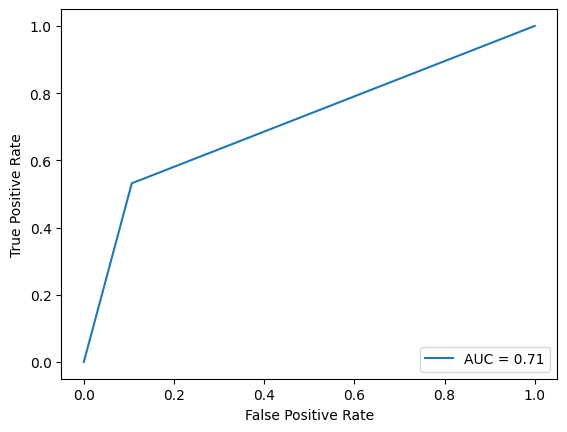

In [141]:
from sklearn.linear_model import LogisticRegression

lr = model_report(LogisticRegression(), features_train, target_train, features_test, target_test)

O modelo apresentou um F1 e AUC-ROC baixo (<70 nas duas métricas). A seguir iremos testar possíveis melhorias no modelo de regressão logística.

* Colocando balanceamento das classes:

F1-Score : 0.6190871369294606
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1287
           1       0.51      0.79      0.62       474

    accuracy                           0.74      1761
   macro avg       0.71      0.75      0.71      1761
weighted avg       0.80      0.74      0.75      1761



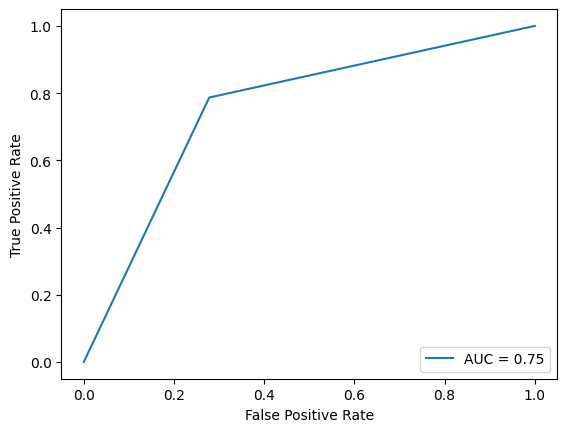

In [142]:
model = LogisticRegression(random_state=12345, class_weight='balanced',solver='liblinear')
lr = model_report(model, features_train, target_train, features_test, target_test)

Podemos ver que houve uma melhora em ambas as métricas. 


* A seguir, iremos otimizar o limiar da classificação:

A função abaixo retornará 1 ou 0 (caso a probalidade seja acima do limiar 1 caso contrario 0).

threashold ótimo :0.62


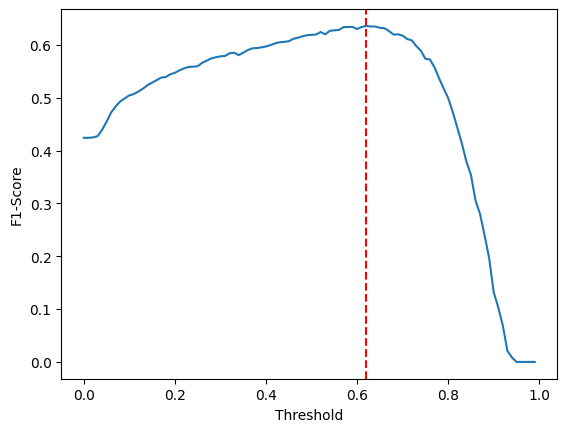

In [143]:
def custom_classifier(proba, threshold):
    return (proba > threshold).astype(int)

proba = lr.predict_proba(features_test)[:,1]

ts, f1_threshold = [], []
for threashold in np.arange(0, 1, .01):
    predicted = custom_classifier(proba, threashold)
    ts.append(threashold)
    f1_threshold.append(f1_score(target_test, predicted))
    
plt.figure()
plt.plot(np.arange(0, 1, .01), f1_threshold)
plt.axvline(x=ts[np.argmax(f1_threshold)], color='r', linestyle='--')
plt.xlabel('Threshold')
plt.ylabel('F1-Score')

optimal_threshold = ts[np.argmax(f1_threshold)]
print(f'threashold ótimo :{optimal_threshold}')

F1-Score : 0.6360153256704981
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1287
           1       0.58      0.70      0.64       474

    accuracy                           0.78      1761
   macro avg       0.73      0.76      0.74      1761
weighted avg       0.80      0.78      0.79      1761



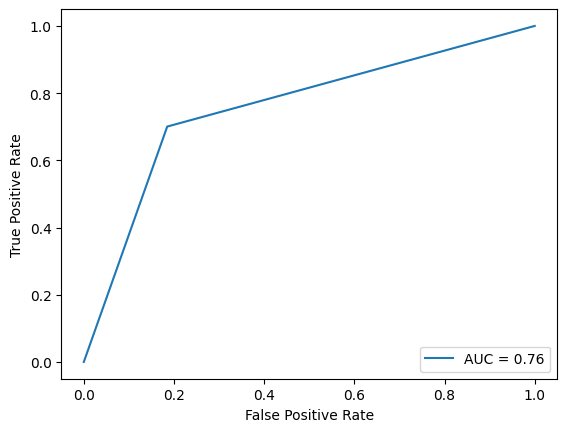

In [144]:
predict = custom_classifier(lr.predict_proba(features_test)[:,1], optimal_threshold)

print(f'F1-Score : {f1_score(target_test, predict)}')
    
print(classification_report(target_test, predict))
    
# AUC-ROC
fpr, tpr, thresholds = roc_curve(target_test, predict)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot();
    
# Confussion Matrix
#ConfusionMatrixDisplay.from_predictions(target_test, predict)

Podemos notar que a melhor regressão logística (F1 e AUC-ROC) é a gerada pela utilização do balanceamento de classe e limiar otimizado.

### Árvore de decisão 

Árvore de Decisão é uma escolha comum em problemas de previsão de Churn, pois permite que as empresas identifiquem os principais fatores que influenciam a decisão dos clientes de rescindir o contrato. Isso ajuda a tomar medidas proativas para reter esses clientes. 

Abaixo iremos importar o modelo desciontreeclassifier, aplicar o treinamento do modelo e testar para as métricas F1 e AUC-ROC.

F1-Score : 0.5036269430051813
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1287
           1       0.49      0.51      0.50       474

    accuracy                           0.73      1761
   macro avg       0.66      0.66      0.66      1761
weighted avg       0.73      0.73      0.73      1761



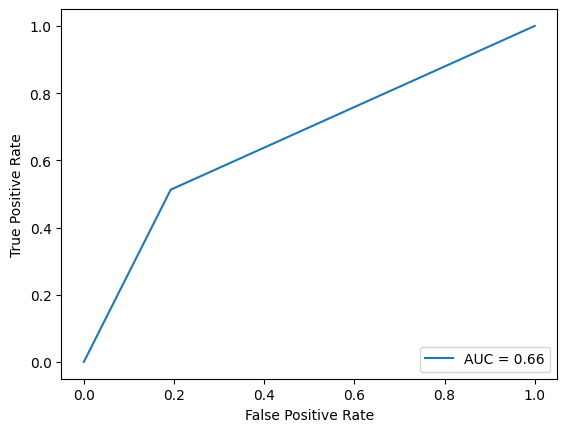

In [145]:
from sklearn.tree import DecisionTreeClassifier
dt = model_report(DecisionTreeClassifier(), features_train, target_train, features_test, target_test)

Após a avaliação do desempenho do modelo de Árvore de Decisão, observamos que as métricas não atenderam às nossas expectativas. Com base nessa análise, concluímos que a Árvore de Decisão pode não ser a escolha mais adequada para o nosso problema de previsão de Churn. Considerando o baixo desempenho do modelo, optamos por explorar outras alternativas para melhorar a precisão das previsões.

### Floresta Aleatória

Empregaremos o modelo de Floresta Aleatória com o propósito de realizar previsões de Churn, seguido de uma análise detalhada das métricas do modelo. 

Importando o modelo, treinando e verificando métricas:

F1-Score : 0.5469678953626635
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1287
           1       0.63      0.49      0.55       474

    accuracy                           0.78      1761
   macro avg       0.73      0.69      0.70      1761
weighted avg       0.77      0.78      0.77      1761



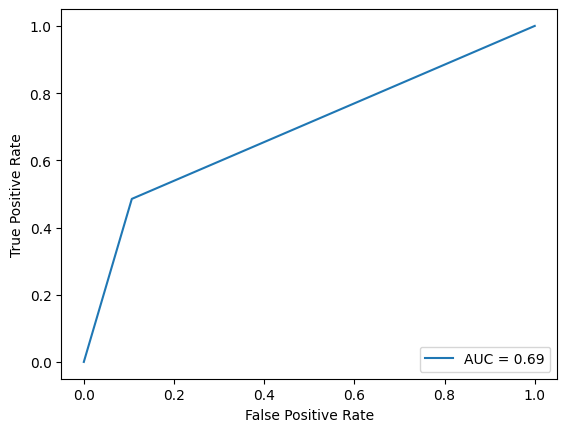

In [146]:
from sklearn.ensemble import RandomForestClassifier

# Iniciamos já com  balanceamento de classe
rf = model_report(RandomForestClassifier(class_weight='balanced'), features_train, target_train, features_test, target_test)

### Conclusão sobre os modelos:

Pode-se observar que a regressão logística, após as otimizações, apresenta métricas de F1 e AUC-ROC aceitáveis, o que a torna uma escolha viável como modelo para previsão de Churn. Além disso, nas versões mais recentes da biblioteca Sklearn, podemos aproveitar a função de Random Search para selecionar os melhores hiperparâmetros.

## Conclusão Geral do Relatório de Previsão de Churn <a id='conclusao'></a>

Este relatório representa uma análise abrangente e avaliação criteriosa de modelos de aprendizado de máquina, todos com o objetivo de aprimorar nossas estratégias de previsão de Churn. Embora tenhamos enfrentado desafios e limitações significativas ao longo deste projeto, como a utilização de uma versão mais antiga do Scikit-Learn, que limitou parte da nossa análise desenvolvida localmente, conseguimos explorar e aplicar três modelos de aprendizado de máquina para prever o Churn. Nossos esforços nos proporcionaram valiosas conclusões e avanços que guiarão nossos próximos passos na retenção de clientes.

Avaliação dos Modelos:

Após uma análise exploratória dos dados e a divisão entre conjuntos de treinamento e teste, empregamos três modelos distintos: Regressão Logística, Árvore de Decisão e Floresta Aleatória, treinando-os com nossos dados e realizando o ajuste fino dos algoritmos. A avaliação desses modelos foi conduzida utilizando métricas-chave, incluindo F1-Score e AUC-ROC. Aqui estão os resultados obtidos:

* Regressão Logística:

    F1-Score: 0.64

    AUC-ROC: 0.76

* Árvore de Decisão:

    F1-Score: 0.51

    AUC-ROC: 0.66

* Floresta Aleatória:

    F1-Score: 0.54

    AUC-ROC: 0.69

Com base nessas métricas, fica evidente que o modelo de Regressão Logística se destacou como a escolha mais sólida.  Portanto, acreditamos que este modelo é a melhor opção para previsão de Churn nesse contexto.

Estamos confiantes de que o uso da Regressão Logística como nosso modelo principal permitirá tomar medidas proativas para reter os clientes da empresa Interconnect.